<a href="https://colab.research.google.com/github/fahmidjobbi/TP-COLLAB/blob/main/Multi_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
url='/content/Dataset_spine.csv'
dataset = pd.read_csv(url)
print(dataset)

          Col1       Col2       Col3       Col4        Col5       Col6  \
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
..         ...        ...        ...        ...         ...        ...   
305  47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395   
306  53.936748  20.721496  29.220534  33.215251  114.365845  -0.421010   
307  61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880   
308  45.252792   8.693157  41.583126  36.559635  118.545842   0.214750   
309  33.841641   5.073991  36.641233  28.767649  123.945244  -0.199249   

         Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0    0.744503  12.5661  14.5386  15.

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [27]:
dataset.drop('Unnamed: 13', inplace=True, axis=1)
dataset

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [28]:
dataset.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [29]:
label=dataset['Class_att']
label

0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: Class_att, Length: 310, dtype: object

In [30]:
dataset.drop('Class_att', inplace=True, axis=1)


In [31]:
dataset

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171
...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(dataset,label,test_size=0.33,random_state=0)

In [35]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=500,solver='sgd',activation="logistic")
clf.fit(X_train, y_train)
clf.predict_proba(X_test)
pred=clf.predict(X_test)



In [36]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)*100
print(acc)

64.07766990291263


In [73]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(hidden_layer_sizes=(3,50), max_iter=500,solver='adam',activation='logistic')
clf1.fit(X_train, y_train)
clf1.predict_proba(X_test)
pred1=clf1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [74]:
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test,pred1)*100
print(acc1)

77.66990291262135


In [75]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test,pred1)
print(CM)

[[50 16]
 [ 7 30]]


Text(0.5, 15.0, 'Predicted label')

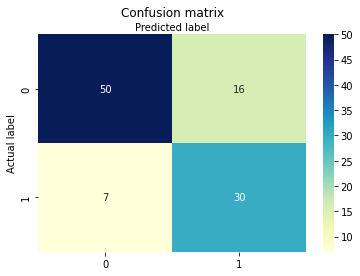

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
# CM1=pd.DataFrame(CM)
# print(CM1)
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))


              precision    recall  f1-score   support

    Abnormal       0.88      0.76      0.81        66
      Normal       0.65      0.81      0.72        37

    accuracy                           0.78       103
   macro avg       0.76      0.78      0.77       103
weighted avg       0.80      0.78      0.78       103

